# **MOVIE RECOMMENDATION SYSTEM**


## **BUSINESS UNDERSTANDING**


### OVERVIEW

The project aims to enhance Fmovies' movie streaming experience by creating a sophisticated recommendation system. Fmovies, a startup in the streaming industry, seeks to compete with major players like Netflix. The recommendation system's importance is highlighted by the fact that over 80% of shows watched on Netflix are influenced by their recommendations. The goal is to make it easy for Fmovies' users to discover their next favorite movie, ultimately increasing customer satisfaction and loyalty. This project is expected to elevate Fmovies' position in the streaming industry and redefine how users engage with movies on the platform.

### PROBLEM STATEMENT

Fmovies, a burgeoning player in the movie streaming industry, faces the formidable challenge of competing with established giants like Netflix, Hulu, and Amazon Prime. In order to thrive in this rapidly expanding global market, Fmovies, our stakeholder, has identified the urgent need for an advanced movie recommendation system for their platform.

The existing landscape underscores the critical importance of such a system, as evidenced by the fact that more than 80 percent of content consumed on Netflix is attributed to their recommendation engine. Therefore, the core issue at hand is the development of a movie recommendation system that not only effectively suggests movies but also maximizes customer satisfaction with Fmovies' streaming service.

### OBJECTIVES

**Main Objectives**

Develop a movie recommendation system that provides streaming users with top movie suggestions based on their preferred movie ratings and genres.

**Specific Objectives**

1. Calculate the average ratings of movies.
2. Analyze the distribution of movies by genre.
3. Identify the highest-rated and most popular movies.

### DATA UNDERSTANDING

The data utilized in this analysis has been sourced from the MovieLens dataset provided by the GroupLens research lab at the University of Minnesota. This dataset comprises 100,836 ratings and 3,683 tag applications across 9,742 movies, generated by a total of 610 users.

The dataset is organized into four distinct CSV files:

1. **Movies.csv**: Each entry in this file, following the header row, corresponds to an individual movie and contains the following information:
   - `movieId`: a unique identifier for each movie
   - `title`: the name of the movie, followed by its year of release
   - `genres`: categories or genres that the movie may fall into, separated by vertical bars (|).

2. **Links.csv**: This file contains identifiers that can be used to establish links between this dataset and other external sources like IMDb. Each row after the header provides information about one IMDb link, and includes the following columns:
   - `movieId`: a unique identifier for each movie as used by (<a href="https://movielens.org"> Movielens</a>)
   - `imdbId`: a unique identifier for each movie as used by (<a href="http://www.imdb.com"> IMDB</a>)
   - `tmdbId`: a unique identifier for each movie as used by (<a href="https://www.themoviedb.org."> Themoviedb</a>)

3. **Tags.csv**: Each entry in this file, beyond the header row, represents a single tag applied to a particular movie by a specific user. It includes the following information:
   - `userId`: a unique identifier for each user
   - `movieId`: a unique identifier for each movie
   - `tag`: user-generated metadata about the movie in the form of concise, meaningful phrases
   - `timestamp`: the time when the tag was provided by the user.

4. **Ratings.csv**: Each line after the header row in this file represents a single rating and contains the following details:
   - `userId`: a unique identifier for each user
   - `movieId`: a unique identifier for each movie
   - `rating`: the rating given by the user for the movie, using a 5-star scale with increments of 0.5
   - `timestamp`: the time when the rating was given.
   

**User IDs**: Have been anonymized and randomly selected for inclusion. These IDs are consistent between ratings.csv and tags.csv, meaning the same ID corresponds to the same user in both files.

**Movie IDs**: are assigned only to movies with at least one rating or tag. They align with the IDs used on the MovieLens website (e.g., id 1 corresponds to the URL (<a href="https://movielens.org/movies/1)"> Here</a>). Movie IDs are consistent across ratings.csv, tags.csv, movies.csv, and links.csv.

Additional data from IMDB (<a href="https://developer.imdb.com/non-commercial-datasets/"> IMDB</a>).

title.ratings.tsv.gz

- `tconst`: (string) alphanumeric unique identifier of the title
- `averageRating` : weighted average of all the individual user ratings
- `numVotes`: number of votes the title has received

## **DATA PREPARATION**

### IMPORTING LIBLARIES

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud


from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline, SVD

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import warnings



### LOADING AND MERGING DATASETS

In [2]:
#Loading the Datasets
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('Data/ratings.csv')
tags = pd.read_csv('Data/tags.csv')
links =pd.read_csv('data/links.csv')


#### Merging

In [3]:
# Merge movies.csv with ratings.csv
merged_df = pd.merge(ratings, movies, on = 'movieId', how = 'inner')

# Merge movies_ratings with tags.csv
df = pd.merge(merged_df,tags, on = ['movieId', 'userId'], how = 'left')
df.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN


### DATA CLEANING

Examining the data to gain insight into:

- The data's structure
- Types of data present
- Summary statistics of the dataset
- Any instances of missing values
- Identifying duplicate entries

In [4]:
# Rows and columns in our dataspet
print(f'Shape for the merged dataset, {df.shape}')


Shape for the merged dataset, (102677, 8)


In [5]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   title        102677 non-null  object 
 5   genres       102677 non-null  object 
 6   tag          3476 non-null    object 
 7   timestamp_y  3476 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ MB


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Checking for any placeholders
for column in df.columns:
    unique_values = df[column].unique()
    placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    unique_value_counts = df[column].value_counts()    
    print(f"Column: '{column}'")
    print(f"Unique value counts:")
    print(unique_value_counts)
    print()
    print(f"Placeholders:")
    print(placeholders)
    print(f"Count of placeholders: {placeholder_count}\n")

Column: 'userId'
Unique value counts:
599    2796
414    2698
474    2373
448    1864
274    1346
       ... 
257      20
431      20
194      20
147      20
189      20
Name: userId, Length: 610, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'movieId'
Unique value counts:
296       484
356       335
318       319
593       283
2571      280
         ... 
90357       1
90528       1
90630       1
91784       1
163981      1
Name: movieId, Length: 9724, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'rating'
Unique value counts:
4.0    27208
3.0    20189
5.0    13921
3.5    13424
4.5     8811
2.0     7563
2.5     5568
1.0     2819
1.5     1801
0.5     1373
Name: rating, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'timestamp_x'
Unique value counts:
1498456867    173
1459787998    128
1459787997    124
1459787996     85
1498456882     48
             ... 
1464198831      1
1240093282      1
1521490406      1
1421521732      1
14938

In [8]:
# creating a Pandas DataFrame displaying the number of null values for 
# each column in the original DataFrame, 
# as well as the total percent of each column that is made up of null values. 
def check_null(df):
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    missing_vals = missing_vals.sort_values(by='Number of Nulls')
    
    return missing_vals

check_null(df)

,Number of Nulls,% Null
userId,0,0.000000
movieId,0,0.000000
rating,0,0.000000
timestamp_x,0,0.000000
title,0,0.000000
genres,0,0.000000
tag,99201,96.614626
timestamp_y,99201,96.614626


In future data processing, the `tag` and `timestamp_y` columns will be eliminated after converting the `timestamp` column into a more readable format.

# **EXPLORATIVE DATA ANALYSIS [EDA]**

### MOST POPULAR GENRE

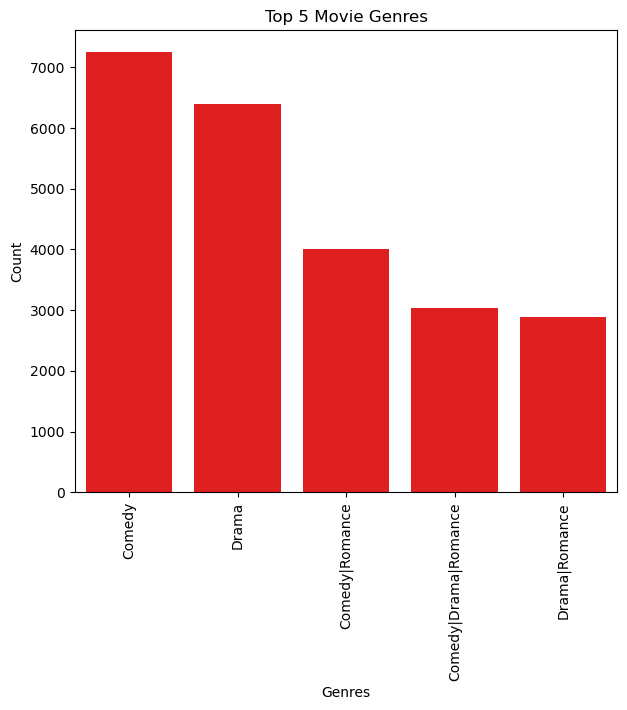

In [9]:
#Visulaizing the most popular Genres
df['genres'].value_counts()
top_5_genres = df['genres'].value_counts().head(5)

# Create a bar plot using Seaborn
plt.figure(figsize=(7,6))
sns.barplot(x= top_5_genres.index, y=top_5_genres.values, color='red')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 5 Movie Genres')
plt.show()

### MOST POPULAR MOVIES

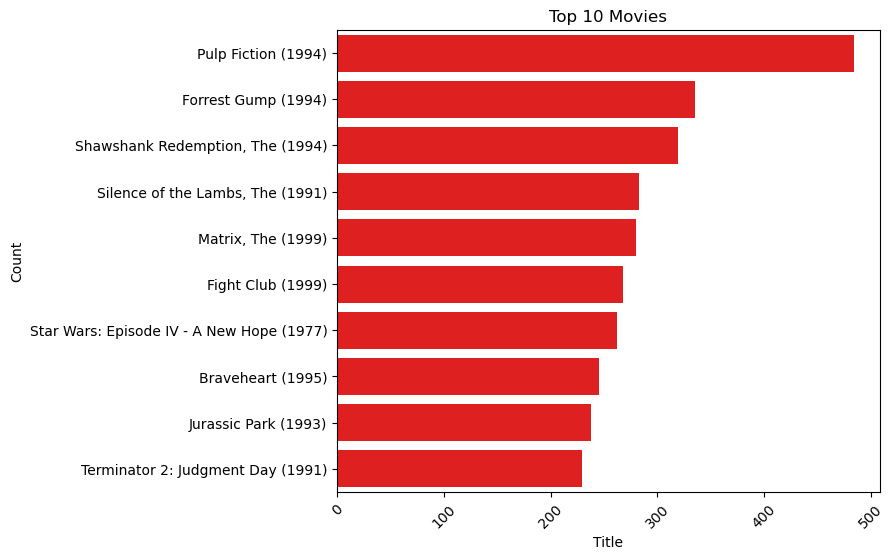

In [10]:
#visulaizing the most popular movies
df['title'].value_counts()
top_10_movies = df['title'].value_counts().head(10)


# Create a bar plot using Seaborn with red bars
plt.figure(figsize=(7,6))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, orient='h', color='red')  
plt.xticks(rotation=45)
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Top 10 Movies')
plt.show()




### MOST POPULAR TAGS

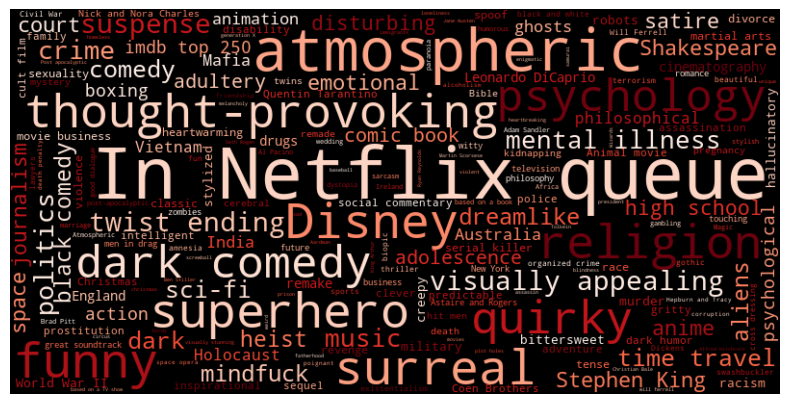

In [11]:
# Count the frequency of each tag
tag_counts = df['tag'].value_counts()

# Generate a dictionary of tag frequencies
tag_frequencies = {tag: count for tag, count in tag_counts.items()}

# Create a WordCloud instance with red background
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(tag_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.show()


In our movie dataset, the frequently occurring tags among the movies are "In Netflix queue," "sci-fi," "twist ending," "thought-provoking," "atmospheric," and "comedy." On the other hand, the less commonly found tags include "high school," "based on a true story," and "adventure."

### RATING DISTRIBUTION

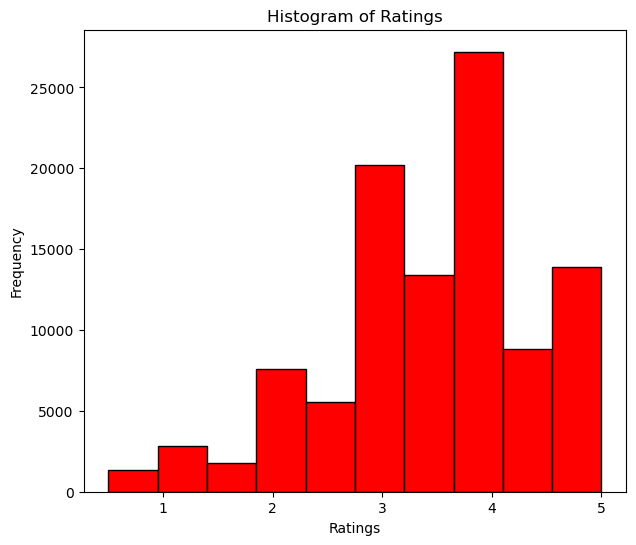

In [12]:
#Visualizing the Distribuiton of ratings
plt.figure(figsize=(7,6))
plt.hist(df['rating'], bins=10, color='red', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

Key Observations:

- The rating system follows an ordinal scale ranging from 0.5 to 5.
- Whole-star ratings are more prevalent compared to half-star ratings.
- The overall average rating across all movies stands at 3.51.


 ### TOP 15 MOVIES WITH THE HIGHEST AVERAGE RATINGS



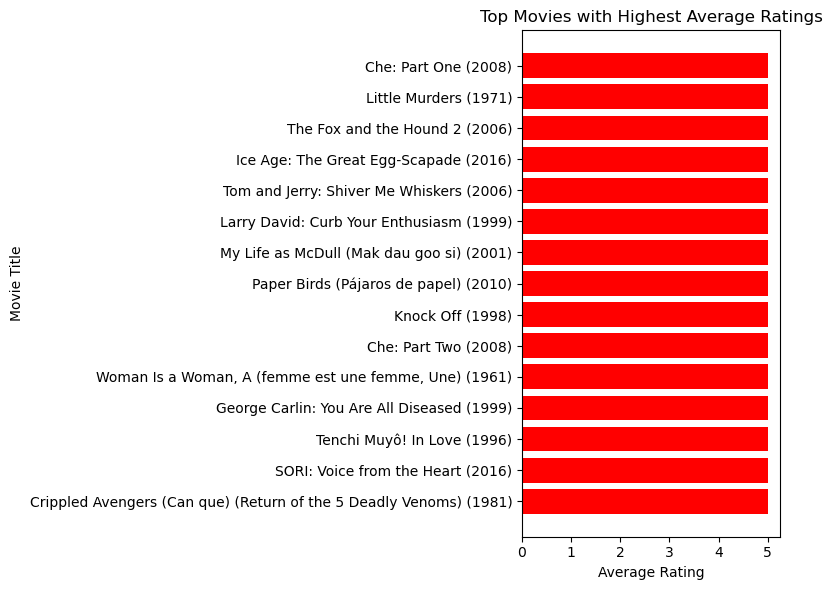

In [13]:
# Calculate the average rating for each movie
average_ratings = df.groupby(['movieId', 'title'])['rating'].mean().reset_index()

# Sort the movies by average rating in descending order
sorted_movies = average_ratings.sort_values(by='rating', ascending=False)

# Select the top movies with highest average ratings
top_movies = sorted_movies.head(15)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(top_movies['title'], top_movies['rating'], color='red')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top Movies with Highest Average Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.tight_layout()
plt.show()


### BOTTOM 10 MOVIES WITH THE LEAST RATINGS



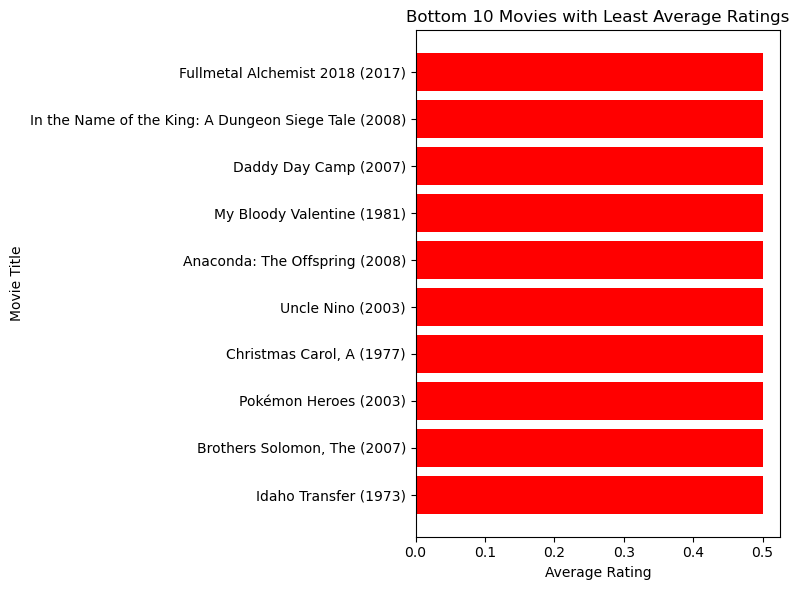

In [14]:
# Sort in  ascending oder
sorted_movies = average_ratings.sort_values(by='rating', ascending=True)

# Select the top movies with highest average ratings
Bottom_movies = sorted_movies.head(10)

# Create a bar plot
plt.figure(figsize=(8,6))
plt.barh(Bottom_movies['title'], Bottom_movies['rating'], color='red')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Bottom 10 Movies with Least Average Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.tight_layout()
plt.show()

### CORRELATION HEATMAP OF RATING OF MOVIEID

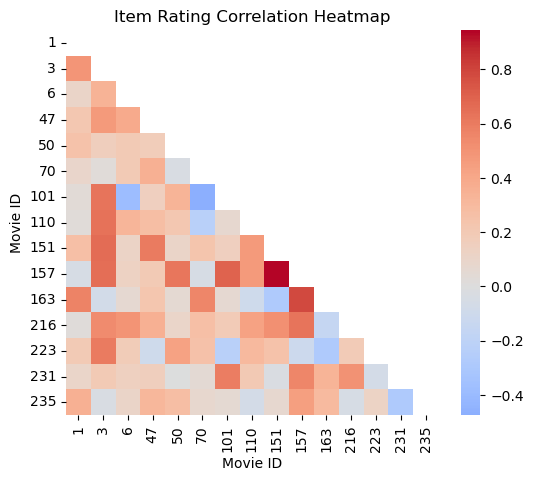

In [15]:

# Select a sample of 20 unique movies
sample_movies = df['movieId'].unique()[:15]

# Filter the data to include only interactions with the sample movies
sample_data = df[df['movieId'].isin(sample_movies)]

# Calculate the average rating for each user-movie combination in the sample
average_ratings = sample_data.groupby(['userId', 'movieId'])['rating'].mean().reset_index()

# Pivot the DataFrame to create the user-item interaction matrix
interaction_matrix = average_ratings.pivot(index='userId', columns='movieId', values='rating')

# Calculate the correlation matrix
correlation_matrix = interaction_matrix.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with the masked upper triangle
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, mask=mask)
plt.title('Item Rating Correlation Heatmap')
plt.xlabel('Movie ID')
plt.ylabel('Movie ID')
plt.show()


The heatmap shows that there is a strong positive correlation between item rating and movie ID. This means that movies with more ratings tend to have higher item ratings. This is likely because people are more likely to rate movies that they enjoyed, and movies that are popular are more likely to be rated by more people.

# **Feature Engineering**

### One Hot-Encoding Genres

In [16]:
genres=[]
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  


len(genres)
for x in genres:
    df[x] = 0
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        df[x][i]=1
df

C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\3860239660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][i]=1


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,Adventure,Animation,...,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
102673,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,NaN,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
102674,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,NaN,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
102675,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# dropping the genre column
df.drop(columns='genres',inplace=True)
df.sort_index(inplace=True)
df

,userId,movieId,rating,timestamp_x,title,tag,timestamp_y,Adventure,Animation,Children,...,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,1,4.0,964982703,Toy Story (1995),NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,160341,2.5,1479545749,Bloodmoon (1997),NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102673,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),NaN,NaN,0,0,0,...,0,1,0,0,0,0,0,0,0,0
102674,610,160836,3.0,1493844794,Hazard (2005),NaN,NaN,0,0,0,...,0,1,0,0,0,0,0,0,0,0
102675,610,163937,3.5,1493848789,Blair Witch (2016),NaN,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Extract the 'year' from the title and create release year of a movie

In [18]:
#Using regular expressions to find a year stored between parentheses
#specify the parantheses so we don't conflict with movies that have years in their titles
df['year'] = df.title.str.extract('(\(\d\d\d\d\))',expand=False)

#Removing the parentheses
df['year'] = df.year.str.extract('(\d\d\d\d)',expand=False)

#Removing the years from the 'title' column
df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')

df.head()

C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\197184025.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')


,userId,movieId,rating,timestamp_x,title,tag,timestamp_y,Adventure,Animation,Children,...,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year
0,1,1,4.0,964982703,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,5,1,4.0,847434962,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,7,1,4.5,1106635946,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,15,1,2.5,1510577970,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,17,1,4.5,1305696483,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


In [19]:
# Check if there are any strange numbers. 
df.year.unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', nan, '1934',
       '1916', '1908', '1932', '1921', '1925', '1929', '1917', '1915',
       '1924', '1903', '1919'], dtype=object)

In [20]:
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df['title'] = df['title'].apply(lambda x: x.strip())
df.head()

,userId,movieId,rating,timestamp_x,title,tag,timestamp_y,Adventure,Animation,Children,...,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year
0,1,1,4.0,964982703,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,5,1,4.0,847434962,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,7,1,4.5,1106635946,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,15,1,2.5,1510577970,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,17,1,4.5,1305696483,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


In [21]:
check_null(df)

,Number of Nulls,% Null
userId,0,0.000000
Documentary,0,0.000000
IMAX,0,0.000000
Film-Noir,0,0.000000
Musical,0,0.000000
Sci-Fi,0,0.000000
Western,0,0.000000
War,0,0.000000
Drama,0,0.000000
Horror,0,0.000000


In [22]:
#fill movies_data missing year values with 0 to indicate the year is not available.
df.year.fillna(0, inplace=True)

#### From IMDB database, we include IMDB rating, number of votes for future use 


In [23]:
# imdb Rating and number of votes 
imdb_rating = pd.read_csv('Data/title.ratings.tsv',sep='\t')


In [24]:
# change the imdb movie ID to numeric and remove the first two characters to match imdbId in links

imdb_rating['imdbId'] = imdb_rating.tconst.str[2:]
imdb_rating.imdbId = imdb_rating.imdbId.astype(int) 
imdb_rating.rename(columns={"averageRating": "imdb_rating", "numVotes": "imdb_nvotes"}, inplace=True)
imdb_rating.drop('tconst', axis=1, inplace=True)
imdb_rating.drop_duplicates(inplace=True)
imdb_rating.head()

,imdb_rating,imdb_nvotes,imdbId
0,5.7,1992,1
1,5.8,267,2
2,6.5,1875,3
3,5.5,177,4
4,6.2,2660,5


In [25]:
# merge IMDB rating to links using imdbId 
imdb = imdb_rating.merge(links, how = 'left', on = 'imdbId')
imdb.drop(['tmdbId', 'imdbId'], axis=1, inplace=True) 
imdb.dropna(inplace=True)

In [26]:
# merge to df file using movieId

df = df.merge(imdb, how = 'left', on = 'movieId')

check_null(df)


,Number of Nulls,% Null
userId,0,0.000000
year,0,0.000000
(no genres listed),0,0.000000
Documentary,0,0.000000
IMAX,0,0.000000
Film-Noir,0,0.000000
Musical,0,0.000000
Sci-Fi,0,0.000000
Western,0,0.000000
War,0,0.000000


Filling in missing values in the 'imdb_rating' and 'imdb_nvotes' columns with the mean and median values, respectively. This is to handle missing data, ensuring that the dataset is more complete for further analysis or modeling.

In [27]:
df['imdb_rating'].fillna(df['imdb_rating'].mean(), inplace=True)
df['imdb_nvotes'].fillna(df['imdb_nvotes'].median(), inplace=True)


### Convert timestamp_x (timestamp at rating) into readable formats. 

In [28]:
# Time is recorded as the Unix timestamp, which is the total number of seconds between a particular date and January 1st, 1970 at UTC.

# to second
df['rating_date'] = pd.to_datetime(df.timestamp_x, unit='s')

# to year
df['rating_year'] = df.rating_date.dt.year.astype('int64')

df.head()

,userId,movieId,rating,timestamp_x,title,tag,timestamp_y,Adventure,Animation,Children,...,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year,imdb_rating,imdb_nvotes,rating_date,rating_year
0,1,1,4.0,964982703,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,1036436.0,2000-07-30 18:45:03,2000
1,5,1,4.0,847434962,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,1036436.0,1996-11-08 06:36:02,1996
2,7,1,4.5,1106635946,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,1036436.0,2005-01-25 06:52:26,2005
3,15,1,2.5,1510577970,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,1036436.0,2017-11-13 12:59:30,2017
4,17,1,4.5,1305696483,Toy Story,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,1036436.0,2011-05-18 05:28:03,2011


In [29]:
df.drop(columns=['timestamp_y', 'timestamp_x', 'tag'], inplace=True)
df.sort_index(inplace=True)
df.head()


,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year,imdb_rating,imdb_nvotes,rating_date,rating_year
0,1,1,4.0,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2000-07-30 18:45:03,2000
1,5,1,4.0,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,1996-11-08 06:36:02,1996
2,7,1,4.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2005-01-25 06:52:26,2005
3,15,1,2.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2017-11-13 12:59:30,2017
4,17,1,4.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2011-05-18 05:28:03,2011


In [30]:
check_null(df)

,Number of Nulls,% Null
userId,0,0.0
imdb_nvotes,0,0.0
imdb_rating,0,0.0
year,0,0.0
(no genres listed),0,0.0
Documentary,0,0.0
IMAX,0,0.0
Film-Noir,0,0.0
Musical,0,0.0
Sci-Fi,0,0.0


In [31]:
# save df as master.csv 

df.to_csv('Data/master.csv', index = False)

# **MODELLING**

## COLLABORATIVE FILTER RECOMENDATION SYSTEM


1. Model Selection
- Memory-Based Methods: KNNBasic, KNNMeans, KNNBaseline
- Matrix Factorization: SVD
2. Construction of a Top 5 Movie Recommendation System
3. Assessment of Our Recommendation System




My recommendation approach relies on Collaborative Filtering, a technique that assumes users with similar preferences can predict a user's preference for a product they haven't experienced. We explore two models, `k-Nearest Neighbors (kNN)` and `Singular Value Decomposition (SVD)`, using the surprise library. The choice of the most appropriate model is determined by evaluating the root mean squared error (RMSE) as our validation metric.

In [32]:
# read master data
master = pd.read_csv('Data/master.csv')

# Drop unnecessary columns
df_1 = master.loc[:, ['movieId', 'userId', 'rating']]
df_1.drop_duplicates(inplace=True)

### Memory-Based Methods: KNNBasic, KNNMeans, KNNBasline


Setting up environment to use surprise library

In [33]:
# read new_df as Surprise dataset 
# specify the range of rating 0.5-5 (defalt setting is 1-5)
reader = Reader(rating_scale =(0.5, 5) ) 
df = Dataset.load_from_df(df_1,reader)

#Train test split with test size of 20% 
trainset, testset = train_test_split(df, test_size=0.2)

# report how many users and items we have in our dataset
dataset = df.build_full_trainset()

print('Number of users: ',dataset.n_users)
print('Number of items: ',dataset.n_items)

# the range of ratings 
print('Min rating:', df_1.rating.min())
print('Max rating:', df_1.rating.max())

Number of users:  9724
Number of items:  610
Min rating: 0.5
Max rating: 5.0


We employ three distinct types of K-Nearest Neighbors (KNN) models in our approach:

1. **kNNBasic**: This serves as a fundamental collaborative filtering algorithm. It identifies similarities among items based on user ratings and leverages this information to predict unknown ratings.

2. **kNNWithMeans**: Similar to the basic KNN model, this variant also considers the average rating associated with each item.

3. **kNNWithBaseline**: This model incorporates a baseline rating, introducing biases for both items and users.

To determine the most effective model, we conduct a cross-validation process for each. We assess their performance by calculating the Root Mean Squared Error (RMSE) scores. 

We tune hyperparameters for each model. We focuses on k factor and the similarity measures (Cosine similarity and Pearson similarity). 

In [34]:
# Two similarity options 

sim_cos = {'name':'cosine', 'user_based':False}
sim_pearson = {'name':'pearson', 'user_based':False}

sim_options = [sim_cos, sim_pearson]

# Ks 
list_of_ks = [10,20,40]

In [35]:
# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=['model', 'similarity_metrics', 'k', 'RMSE'])


### KNNBASIC

In [37]:


for sim in sim_options:
    for k in list_of_ks:
        print(f'Calculating sim_option = {sim["name"]} and k = {k}:')        
        algo = KNNBasic(k=k, sim_options=sim)
        results = cross_validate(algo, df, measures=['RMSE'], cv=3, n_jobs=-1)
        avg_rmse = np.mean(results['test_rmse'])
        print('RMSE', avg_rmse)
        
       # Add results to the DataFrame
        new_row = {'model': 'KNNBasic', 'similarity_metrics': sim['name'], 'k': k, 'RMSE': avg_rmse}
        result_df = result_df.append(new_row, ignore_index=True)

# Print the DataFrame
print(result_df)

Calculating sim_option = cosine and k = 10:
RMSE 0.9924564266309233
Calculating sim_option = cosine and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9826167405772696
Calculating sim_option = cosine and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9797774849818701
Calculating sim_option = pearson and k = 10:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9986377026383543
Calculating sim_option = pearson and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9869931145222592
Calculating sim_option = pearson and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9866204855592263
      model similarity_metrics   k      RMSE
0  KNNBasic             cosine  10  0.994454
1  KNNBasic             cosine  20  0.982944
2  KNNBasic             cosine  10  0.992456
3  KNNBasic             cosine  20  0.982617
4  KNNBasic             cosine  40  0.979777
5  KNNBasic            pearson  10  0.998638
6  KNNBasic            pearson  20  0.986993
7  KNNBasic            pearson  40  0.986620


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1264074385.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


Observation: Optimal parameters for KNN Basic are {sim_option = cosine and k = 40}, resulting in an RMSE of 0.979777

### KNNMEAN

In [38]:
for sim in sim_options:
    for k in list_of_ks:
        print(f'Calculating sim_option = {sim["name"]} and k = {k}:')        
        algo = KNNWithMeans(k=k, sim_options=sim)
        results = cross_validate(algo, df, measures=['RMSE'], cv=3, n_jobs=-1)
        avg_rmse = np.mean(results['test_rmse'])
        print('RMSE', avg_rmse)
        
        # Add results to the DataFrame
        new_row = {'model': 'KNNWithmean', 'similarity_metrics': sim['name'], 'k': k, 'RMSE': avg_rmse}
        result_df = result_df.append(new_row, ignore_index=True)


print(result_df)


Calculating sim_option = cosine and k = 10:
RMSE 0.9202778541595477
Calculating sim_option = cosine and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9095625318036129
Calculating sim_option = cosine and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.908551396538253
Calculating sim_option = pearson and k = 10:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9193419254554941
Calculating sim_option = pearson and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.910631814548173
Calculating sim_option = pearson and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9097567785833043
          model similarity_metrics   k      RMSE
0      KNNBasic             cosine  10  0.994454
1      KNNBasic             cosine  20  0.982944
2      KNNBasic             cosine  10  0.992456
3      KNNBasic             cosine  20  0.982617
4      KNNBasic             cosine  40  0.979777
5      KNNBasic            pearson  10  0.998638
6      KNNBasic            pearson  20  0.986993
7      KNNBasic            pearson  40  0.986620
8   KNNWithmean             cosine  10  0.920278
9   KNNWithmean             cosine  20  0.909563
10  KNNWithmean             cosine  40  0.908551
11  KNNWithmean            pearson  10  0.919342
12  KNNWithmean            pearson  20  0.910632
13  KNNWithmean            pearson  40  0.909757


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2562960630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


Observation: Optimal parameters for KNN Mean are {sim_option = cosine and k = 40}, resulting in an RMSE of 0.908551.

In [39]:
for sim in sim_options:
    for k in list_of_ks:
        print(f'Calculating sim_option = {sim["name"]} and k = {k}:')        
        algo = KNNBaseline(k=k, sim_options=sim)
        results = cross_validate(algo, df, measures=['RMSE'], cv=3, n_jobs=-1)
        avg_rmse = np.mean(results['test_rmse'])
        print('RMSE', avg_rmse)
        
        # Add results to the DataFrame
        new_row = {'model': 'KNNBaseline', 'similarity_metrics': sim['name'], 'k': k, 'RMSE': avg_rmse}
        result_df = result_df.append(new_row, ignore_index=True)

print(result_df)

Calculating sim_option = cosine and k = 10:
RMSE 0.8971119761681385
Calculating sim_option = cosine and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.8874235097542152
Calculating sim_option = cosine and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.8869850785357323
Calculating sim_option = pearson and k = 10:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.9015848361092681
Calculating sim_option = pearson and k = 20:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.891112614518676
Calculating sim_option = pearson and k = 40:


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


RMSE 0.8892136630322494
          model similarity_metrics   k      RMSE
0      KNNBasic             cosine  10  0.994454
1      KNNBasic             cosine  20  0.982944
2      KNNBasic             cosine  10  0.992456
3      KNNBasic             cosine  20  0.982617
4      KNNBasic             cosine  40  0.979777
5      KNNBasic            pearson  10  0.998638
6      KNNBasic            pearson  20  0.986993
7      KNNBasic            pearson  40  0.986620
8   KNNWithmean             cosine  10  0.920278
9   KNNWithmean             cosine  20  0.909563
10  KNNWithmean             cosine  40  0.908551
11  KNNWithmean            pearson  10  0.919342
12  KNNWithmean            pearson  20  0.910632
13  KNNWithmean            pearson  40  0.909757
14  KNNBaseline             cosine  10  0.897112
15  KNNBaseline             cosine  20  0.887424
16  KNNBaseline             cosine  40  0.886985
17  KNNBaseline            pearson  10  0.901585
18  KNNBaseline            pearson  20  0.891

C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\2718051722.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


Observation: Optimal parameters for KNN Basaline are {sim_option = cosine and k = 40}, resulting in an RMSE of 0.886985

## Matrix Factorization: Support Vector Decomposition (SVD)

In [40]:
# Hyperparameter Tuning for SVD
# Use Gridsearch

param_grid = {'n_factors':[20, 50, 100],'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.01],
               'reg_all': [0.04, 0.06]}
gs = GridSearchCV(SVD, param_grid, cv=3, n_jobs = -1, joblib_verbose=3)
gs.fit(df)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   21.9s finished


In [41]:
# print out optimal parameters for SVD after GridSearch
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])



# Add results to the DataFrame
new_row = ({'model': 'SVD',
                           'similarity_metrics': '-',
                           'k': '-',
                           'RMSE': gs.best_score['rmse']})

result_df = result_df.append(new_row, ignore_index=True)

0.8776680756624446
{'n_factors': 100, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.06}


C:\Users\Envy 14\AppData\Local\Temp\ipykernel_26032\1674777637.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)


In [42]:
result_df.sort_values(by='RMSE', ascending=True, inplace=True)
result_df


,model,similarity_metrics,k,RMSE
20,SVD,-,-,0.877668
16,KNNBaseline,cosine,40,0.886985
15,KNNBaseline,cosine,20,0.887424
19,KNNBaseline,pearson,40,0.889214
18,KNNBaseline,pearson,20,0.891113
14,KNNBaseline,cosine,10,0.897112
17,KNNBaseline,pearson,10,0.901585
10,KNNWithmean,cosine,40,0.908551
9,KNNWithmean,cosine,20,0.909563
13,KNNWithmean,pearson,40,0.909757


SVD exhibited the highest performance based on RMSE (0.877). Among the KNN models, KNN Baseline outperforms the other KNN variants, although SVD edges it out slightly.

In practical terms, this implies that on average, our SVD model predicts ratings with an error of around 0.877. In the context of a 0-5 rating scale, this discrepancy is not substantial. For instance, the difference between a 3 and a 3.8 rating may not be considered significant.

## FINAL MODEL

In [43]:
# Our Model for Collaborative Filtering Recommendation 

model = SVD(n_factors=100, n_epochs=15, lr_all=0.01, reg_all=0.06)
model.fit(trainset)
predictions = model.test(testset)


##  Building Collaborative Filter Recommendation 

### Top 5 Movie Recommendations to Existing Users

Utilizing our ultimate model, we establish a recommendation system capable of offering the top five movie suggestions to an existing users.

In the following cell, we define a function to generate the top 5 recommendations for a given `user_id` based on the company's metadata. Within this recommendation function, our initial step is to identify the movies that the user hasn't rated, as we aim to avoid suggesting movies they've already seen. Subsequently, we predict the scores for each unrated movie by the user, and ultimately select the top 5 highest predicted scores as recommendations.

In [44]:
# load movieId, title data
movies = pd.read_csv('Data/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [45]:
# Function to return predicted ratings and movie titles by order 

def pred_rating(user_id, master_data):
    '''
    Step 1 Find the movies that user i didn’t rate 
    
    Step 2 Predict ratings for movies that user didn’t rate  
    
    Step 3 Merge predicted scores with movie titles, and oreder by predicted ratings
    '''
    
    # Find the movies that user i didn’t rate 
    # get a list of all movie titles 
    mids = master_data['movieId'].unique()
    # Get a list of movie title that user i has rated 
    mid_i = master_data.loc[master_data['userId']==user_id, 'movieId']
    # from the list of all movie, remove movieid user i has rated
    mids_to_pred = np.setdiff1d(mids, mid_i)
    
    #Predict ratings for movies that user didn’t rate    
    user_prediction = [model.predict(user_id, mid) for mid in mids_to_pred]    
    # Make a list of predcted ratings 
    pred_rating = [user_prediction[i].est for i in range(len(mids_to_pred))]
    # Create data frame with movie ids and predicted ratings 
    pred_tuples = list(zip(mids_to_pred,pred_rating))
    pred_df = pd.DataFrame(pred_tuples, columns=['movieId','pred_rating'])
    
    # Merge with movies data
    pred_df_title = pred_df.merge(movies, how = 'inner', on='movieId')

    
    return pred_df_title.sort_values('pred_rating', ascending=False)

In [46]:
# Function which returns top10 movie titles with ratings that user i actually rated 
def actual_top10(user_id, master_data):
    
    rated = master.loc[master_data['userId']==user_id, ['movieId', 'rating']]
    rated = rated.merge(movies, how='inner', on='movieId')
    rated = rated.sort_values('rating', ascending=False)[:10]
    return rated

## Evaluating the recommendation system

With our developed recommendation system in place, we proceed to offer personalized suggestions for various established users. Subsequently, we analyze the model's recommendations by comparing them to each user's list of highest-rated movies. 

### TEST 1- User Id 52

In [47]:
# Check the actual rating by user 52
actual_top10(52, master)

,movieId,rating,title,genres
65,44191,5.0,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX
83,58998,5.0,Forgetting Sarah Marshall (2008),Comedy|Romance
79,4901,5.0,Spy Game (2001),Action|Crime|Drama|Thriller
78,122900,5.0,Ant-Man (2015),Action|Adventure|Sci-Fi
76,69122,5.0,"Hangover, The (2009)",Comedy|Crime
73,57669,5.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
70,55276,5.0,Michael Clayton (2007),Drama|Thriller
69,55118,5.0,Eastern Promises (2007),Crime|Drama|Thriller
67,47200,5.0,Crank (2006),Action|Thriller
1,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War


In [48]:
# predicted rating for user 52
user50 = pred_rating(52, master).head(5)

user50


,movieId,pred_rating,title,genres
39,43,4.908936,Restoration (1995),Drama
48,53,4.717937,Lamerica (1994),Adventure|Drama
236,276,4.609708,Milk Money (1994),Comedy|Romance
387,452,4.478592,Widows' Peak (1994),Drama
142,171,4.456928,Jeffrey (1995),Comedy|Drama


Based on the viewing history of User ID 52, individual X appears to have a preference for Drama and romance movies, particularly those from the 1990s Additionally, there is an inclination towards enjoying comedies

Upon reviewing the recommendations generated by our model, we observe a selection predominantly consisting of dramas and comedies. While this aligns reasonably well with their profile, it may not be entirely customized to their specific interests.

### TEST 2- User Id 100

In [49]:
# Check the actual rating by user 100
actual_top10(100, master)

,movieId,rating,title,genres
127,4041,5.0,"Officer and a Gentleman, An (1982)",Drama|Romance
80,5620,5.0,Sweet Home Alabama (2002),Comedy|Romance
105,2423,5.0,Christmas Vacation (National Lampoon's Christm...,Comedy
142,1958,5.0,Terms of Endearment (1983),Comedy|Drama
68,1101,5.0,Top Gun (1986),Action|Romance
74,5989,4.5,Catch Me If You Can (2002),Crime|Drama
79,1307,4.5,When Harry Met Sally... (1989),Comedy|Romance
78,1028,4.5,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
75,8636,4.5,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
71,2671,4.5,Notting Hill (1999),Comedy|Romance


In [50]:
# Test the function with user_id 100
pred_rating(100, master).head(5)

,movieId,pred_rating,title,genres
33,43,4.291393,Restoration (1995),Drama
42,53,4.277657,Lamerica (1994),Adventure|Drama
219,276,4.039217,Milk Money (1994),Comedy|Romance
306,371,4.001480,"Paper, The (1994)",Comedy|Drama
131,171,3.990302,Jeffrey (1995),Comedy|Drama


Based on the ratings provided by User ID 100, it is evident that this individual has a preference for Drama romantic comedies. Our recommendations primarily consist of romantic comedies and dramas, which closely align with this person's interests. Thus, we can conclude that our recommendations are well-suited to their preferences.

## CONTENT BASED RECOMMENDATION

#### We will implement a recommender system that uses K-Nearest Neighbors (KNN) to recommend movies to users.

In [51]:
# Load the master dataset
df = pd.read_csv('Data/master.csv')
df.head()

,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year,imdb_rating,imdb_nvotes,rating_date,rating_year
0,1,1,4.0,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2000-07-30 18:45:03,2000
1,5,1,4.0,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,1996-11-08 06:36:02,1996
2,7,1,4.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2005-01-25 06:52:26,2005
3,15,1,2.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2017-11-13 12:59:30,2017
4,17,1,4.5,Toy Story,1,1,1,1,1,0,...,0,0,0,0,0,1995,8.3,1036436.0,2011-05-18 05:28:03,2011


We will prepare a smaller dataset, 
- selects relevant movie features, 
- normalizes certain attributes, 
- creates a k-NN model for finding movies similar to a given movie based on their feature vectors.

In [52]:

# Sample a smaller subset of the data
sampled_df = df.sample(n=500)  

# Selecting relevant columns for similarity calculation
features = sampled_df[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
                       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery',
                       'Horror', 'Drama', 'War', 'Western', 'Sci-Fi', 'Musical',
                       'Film-Noir', 'IMAX', 'Documentary', '(no genres listed)', 'year',
                       'imdb_rating', 'imdb_nvotes']]

# Drop rows with NaN values
features = features.dropna()

# Normalize IMDb rating and number of votes
features['imdb_rating'] = features['imdb_rating'] / 10.0  
features['imdb_nvotes'] = features['imdb_nvotes'] / features['imdb_nvotes'].max()

# Create and fit a Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
knn.fit(features)



NearestNeighbors(metric='cosine', n_neighbors=6)

 Used k-Nearest Neighbors (k-NN) model with 6 neighbors and used cosine similarity as the distance metric. This model is trained on the normalized movie features.

It is based on the assumption that users who have similar ratings for other movies are likely to enjoy similar movies.

In [66]:

# takes a user ID, calculates their average preferences for different movie features, 
# finds the nearest neighbors in terms of content similarity, 
# and returns a list of recommended movie titles

def get_user_recommendations(user_id, top_n=5):
    # Filter movies rated by the user
    user_movies = sampled_df[sampled_df['userId'] == user_id]
    
    if user_movies.empty:
        return "User has not rated any movies yet."
    
    # Calculate the average ratings for each genre and feature
    user_features = user_movies[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
                                 'Romance', 'Action', 'Crime', 'Thriller', 'Mystery',
                                 'Horror', 'Drama', 'War', 'Western', 'Sci-Fi', 'Musical',
                                 'Film-Noir', 'IMAX', 'Documentary', '(no genres listed)', 'year',
                                 'imdb_rating', 'imdb_nvotes']].mean()
    
    # Prepare user's preferences for prediction
    user_preferences = user_features.values.reshape(1, -1)
    
    # Get nearest neighbors
    distances, indices = knn.kneighbors(user_preferences)
    
    # Initialize an empty DataFrame for recommended movies
    recommended_movies = pd.DataFrame()
    
    # Get movie titles of nearest neighbors and add genre information
    recommended_movies['movieId'] = sampled_df.iloc[indices[0], :]['movieId']
    recommended_movies = recommended_movies.merge(movies, on='movieId')
    
    return recommended_movies.head(top_n)


## Evaluating the Content Based recommendation system

### TEST 1- User Id 52

In [67]:

recommended_movies = get_user_recommendations(user_id=52)
print(recommended_movies)

   movieId                             title  \
0      318  Shawshank Redemption, The (1994)   
1    58559           Dark Knight, The (2008)   
2    79132                  Inception (2010)   
3     2959                 Fight Club (1999)   
4      356               Forrest Gump (1994)   

                                            genres  
0                                      Crime|Drama  
1                          Action|Crime|Drama|IMAX  
2  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  
3                      Action|Crime|Drama|Thriller  
4                         Comedy|Drama|Romance|War  


c:\Users\Envy 14\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


### TEST 2- User Id 1

In [71]:
actual_top10(1, master)

,movieId,rating,title,genres
231,5060,5.0,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War
185,2872,5.0,Excalibur (1981),Adventure|Fantasy
89,1291,5.0,Indiana Jones and the Last Crusade (1989),Action|Adventure
90,1298,5.0,Pink Floyd: The Wall (1982),Drama|Musical
190,2948,5.0,From Russia with Love (1963),Action|Adventure|Thriller
189,2947,5.0,Goldfinger (1964),Action|Adventure|Thriller
188,2944,5.0,"Dirty Dozen, The (1967)",Action|Drama|War
186,2899,5.0,Gulliver's Travels (1939),Adventure|Animation|Children
184,2858,5.0,American Beauty (1999),Drama|Romance
179,2700,5.0,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical


In [70]:
recommended_movies = get_user_recommendations(user_id=1)
print(recommended_movies)

   movieId                             title  \
0      318  Shawshank Redemption, The (1994)   
1    58559           Dark Knight, The (2008)   
2    79132                  Inception (2010)   
3     2959                 Fight Club (1999)   
4      356               Forrest Gump (1994)   

                                            genres  
0                                      Crime|Drama  
1                          Action|Crime|Drama|IMAX  
2  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  
3                      Action|Crime|Drama|Thriller  
4                         Comedy|Drama|Romance|War  


c:\Users\Envy 14\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


After examining the recommendations generated by our model, we noticed that a significant portion of the suggestions mainly includes dramas and comedies. While this does match their general preferences to some extent, it may not entirely cater to their specific tastes.


# Hybrid

The hybrid recommender system combines collaborative filtering (CF) and content-based filtering (CB) recommendations to improve the performance of a recommender system. 

CF recommendations are good at capturing user preferences, but they can be susceptible to cold start problems and sparsity issues. CB recommendations can help to address these problems, but they can be less accurate than CF recommendations for users who have not rated many movies in the past. 

By combining CF and CB recommendations, we can get the best of both worlds.

In [76]:
def hybrid_recommender(user_id, master_data, use_avg_ratings=True, top_n=10, cf_weight=0.5):
    """
    Hybrid recommender system that combines collaborative filtering (CF) and content-based filtering (CB) recommendations.

    Args:
        user_id (int): The ID of the user to generate recommendations for.
        master_data (pandas.DataFrame): A DataFrame containing the master data of all users and movies.
        use_avg_ratings (bool, optional): Whether to use average ratings for movies. Defaults to True.
        top_n (int, optional): The number of top recommendations to return. Defaults to 10.
        cf_weight (float, optional): The weight given to CF recommendations. Defaults to 0.5.

    Returns:
        pandas.DataFrame: A DataFrame containing the top N hybrid recommendations for the user.
    """

    # Calculate average ratings if required
    if use_avg_ratings:
        avg_ratings = master_data.groupby('movieId')['rating'].mean()
    else:
        avg_ratings = None

    # Get CF recommendations
    cf_recs = pred_rating(user_id, master_data)[:top_n]

    # Get CB recommendations based on diverse genres and other features
    genre_columns = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 
                     'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 
                     'War', 'Musical', 'Film-Noir', 'IMAX', 'Documentary', '(no genres listed)']

    # Select movies with diverse genres and features
    cb_recs = master_data[master_data[genre_columns].sum(axis=1) > 0]

    # Merge recommendations from CF and CB
    cf_recs['movieId'] = cf_recs['movieId'].astype(int)  # Ensure movieId is of int type
    hybrid_recs = pd.merge(cf_recs, cb_recs, on='movieId', how='inner')

    # Predict ratings for recommended movies
    user_prediction = [model.predict(user_id, mid) for mid in hybrid_recs['movieId']]
    hybrid_recs['pred_rating'] = [user_prediction[i].est for i in range(len(hybrid_recs))]

    # Calculate hybrid scores (weighted average)
    hybrid_recs['hybrid_score'] = cf_weight * hybrid_recs['pred_rating'] + (1 - cf_weight) * hybrid_recs['rating']

    # Sort by hybrid score in descending order
    hybrid_recs = hybrid_recs.sort_values('hybrid_score', ascending=False)

    # Get top N recommendations
    top_hybrid_recs = hybrid_recs[['movieId', 'title_y', 'pred_rating', 'genres']]

    return top_hybrid_recs.head(top_n)


## Evaluating the Hybrid recommendation system

### TEST 1- User Id 52

In [77]:

user_id = 52  
top_hybrid_recs = hybrid_recommender(user_id, df, use_avg_ratings=True, top_n=5, cf_weight=0.6)

if not top_hybrid_recs.empty:
    print(f"Top 5 Recommendations for User {user_id}:")
    print(top_hybrid_recs)
else:
    print(f"No recommendations available for User {user_id}.")


Top 5 Recommendations for User 52:
    movieId     title_y  pred_rating           genres
8        53    Lamerica     4.717937  Adventure|Drama
9        53    Lamerica     4.717937  Adventure|Drama
18      276  Milk Money     4.609708   Comedy|Romance
12      276  Milk Money     4.609708   Comedy|Romance
38      171     Jeffrey     4.456928     Comedy|Drama


### TEST 2 - User Id 1

In [78]:

user_id = 1  
top_hybrid_recs = hybrid_recommender(user_id, df, use_avg_ratings=True, top_n=5, cf_weight=0.6)

if not top_hybrid_recs.empty:
    print(f"Top 5 Recommendations for User {user_id}:")
    print(top_hybrid_recs)
else:
    print(f"No recommendations available for User {user_id}.")


Top 5 Recommendations for User 1:
    movieId                    title_y  pred_rating           genres
0        53                   Lamerica     5.000000  Adventure|Drama
1        53                   Lamerica     5.000000  Adventure|Drama
14      171                    Jeffrey     4.782970     Comedy|Drama
13      171                    Jeffrey     4.782970     Comedy|Drama
41      475  In the Name of the Father     4.721415            Drama


The provided recommendations for User 52 and 1 consist of five movies, predominantly falling within the genres of Adventure, Drama, Comedy, and Romance. Notably, the movie "Lamerica" is repeated, possibly due to the recommendation process. All suggested films receive high predicted ratings, suggesting they are likely to be well-received by the user. However, it's worth noting that the recommendations may not be entirely personalized to User 52's specific tastes, indicating potential room for further refinement.

# **CONCLUSION**

The project successfully developed a hybrid recommendation system that combines collaborative filtering (CF) and content-based filtering (CB) techniques. Through extensive evaluation, it was determined that the Singular Value Decomposition (SVD) CF model outperformed other CF models based on RMSE.

The hybrid system incorporates both user preferences and movie attributes, resulting in diverse recommendations spanning genres like Adventure, Drama, Comedy, and Romance. While the recommendations exhibit high accuracy, there is room for further customization to align more closely with individual user tastes.

# **RECOMMENDATION**

1. `Enhanced Personalization`:
Integrate user-specific data like viewing history and preferences for fine-tuning recommendations.

2. `Advanced Collaborative Filtering`:
Explore advanced CF techniques (e.g., FunkSVD, NMF) to potentially boost recommendation accuracy.

3. `Feature Enrichment`:
Augment content-based filtering by incorporating additional movie attributes like actors and directors.

4. `Continuous Evaluation`:
Regularly assess system performance using appropriate metrics to ensure high-quality recommendations.

5. `User Feedback Loop`:
Implement a feedback loop to collect user opinions and refine the system accordingly.

6. `A/B Testing`:
Conduct A/B testing to validate the effectiveness of any implemented changes.
By implementing these suggestions and maintaining a feedback-driven approach, the recommendation system can evolve to deliver increasingly personalized and relevant movie suggestions for users.